1.2532418085611319 2.745502230882486


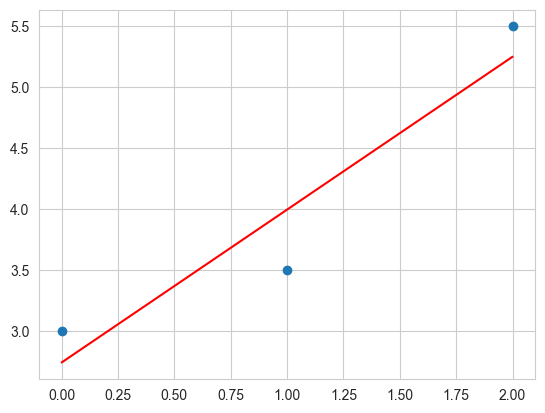

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.saving.saved_model.load import metrics

X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])
W = 0 # 기울기
b = 0 # 절편
lrate = 0.01 # 학습률
epochs = 1000 # 반복 횟수
n = float(len(X)) # 입력 데이터의 개수
# 경사 하강법
for i in range(epochs):
    y_pred = W*X + b # 예측값
    dW = (2/n) * sum(X * (y_pred-y))
    db = (2/n) * sum(y_pred-y)
    W = W - lrate * dW # 기울기 수정
    b = b - lrate * db # 절편 수정
# 기울기와 절편을 출력한다.
print (W, b)
# 예측값을 만든다.
y_pred = W*X + b
# 입력 데이터를 그래프 상에 찍는다.
plt.scatter(X, y)
# 예측값은 선그래프로 그린다.
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

In [95]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense

model = tf.keras.models.Sequential()

model.add(Input(shape=(2,)))
model.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=0.3))

model.fit(X, y, batch_size=1, epochs=10000)

print(model.predict(X))

Epoch 1/10000


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (1,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1,), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [96]:
import matplotlib.pyplot as plt
import tensorflow as tf
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [97]:
print(train_images.shape)

(60000, 28, 28)


In [98]:
print(train_labels.shape)

(60000,)


In [99]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [100]:
test_labels[0]

np.uint8(7)

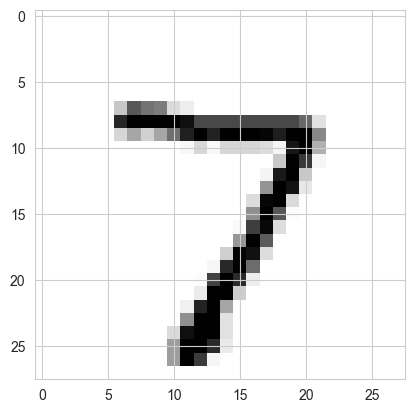

In [101]:
plt.imshow(test_images[0], cmap="Greys")

In [102]:
# model = tf.keras.models.Sequential()
#
# model.add(tf.keras.models.Input(shape=(784,)))
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [103]:
model = tf.keras.models.Sequential()

In [104]:
model.add(tf.keras.layers.Input(shape=(28*28,)))
model.add(tf.keras.layers.Dense(units=512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [105]:
train_images = train_images.reshape(60000, 28*28)

In [106]:
train_images = train_images / 255.0

In [107]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [108]:
test_images = test_images.reshape(10000,28*28)
test_images = test_images / 255.0

In [109]:
test_labels = tf.keras.utils.to_categorical(test_labels)

In [110]:
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [85]:
# train_labels = 0
# test_labels = 0

In [111]:
train_labels = tf.keras.utils.to_categorical(train_labels)

In [112]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [113]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [114]:
model.fit(x=train_images, y=train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9340 - loss: 0.2248
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0832
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0531
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0362
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0271
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9931 - loss: 0.0212
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0177
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0139
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9957 - loss: 0.0131
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9958 - loss: 0.0124


In [115]:
(test_loss, test_accuracy) = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9816 - loss: 0.0779


In [116]:
print(test_accuracy)

0.9815999865531921


In [117]:
print(test_loss)

0.07791460305452347


In [118]:
model.save("MNIST_PARAM.keras")

In [119]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

In [120]:
import cv2 as cv

In [130]:
image = cv.imread("three.png", cv.IMREAD_GRAYSCALE)

In [137]:
cv.imshow("Window", image)
cv.waitKey(0)
cv.destroyAllWindows()

In [132]:
image = cv.resize(image,(28,28))

In [134]:
image = image.astype('float32')

In [135]:
image = image.reshape(1, 28*28)

In [136]:
image = 255.0-image

In [138]:
image /= 255.0

In [139]:
predict = model.predict(image, batch_size=1)
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[5.1972857e-22 3.8575061e-16 1.3059806e-12 1.0000000e+00 2.1060592e-25
  3.1172255e-16 5.2962022e-27 1.9661445e-16 2.6734337e-16 1.9302418e-17]]


In [140]:
print(f"가장 큰 값은 : {predict.argmax()}")

가장 큰 값은 : 3
